In [22]:
import numpy as np

D = np.loadtxt('factorization_data/measurement_matrix.txt')
m, n = D.shape

print(m)
print(n)

202
215


In [23]:
norm_D = np.zeros((m, n))
for i in range(m):
    norm_D[i, :] = D[i, :] - np.mean(D[i, :])

In [24]:
import scipy

U, W, V = np.linalg.svd(norm_D, full_matrices=False)

W = np.diag(W)
print(U.shape)
print(W.shape)
print(V.shape)
U3 = U[:, 0:3]
W3 = W[0:3, 0:3]
# V3 = V[:, 0:3]
V3 = V[0:3, :]


(202, 202)
(202, 202)
(202, 215)


In [25]:


M = np.dot(U3, scipy.linalg.fractional_matrix_power(W3, 0.5))
S = np.dot(scipy.linalg.fractional_matrix_power(W3, 0.5), V3)
estimated_D = np.dot(M, S)
# estimated_D = np.zeros((m, n))
for i in range(m):
    estimated_D[i, :] = estimated_D[i, :] + np.mean(D[i, :])
print(estimated_D.shape)

(202, 215)


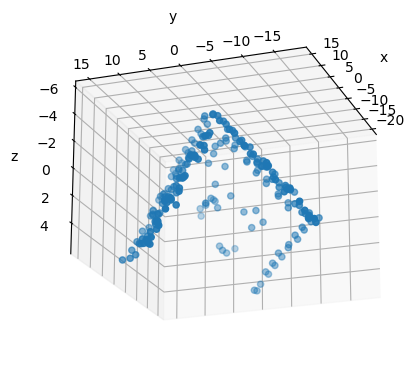

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S[0, :], S[1, :], S[2, :])
ax.view_init(160, 160)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

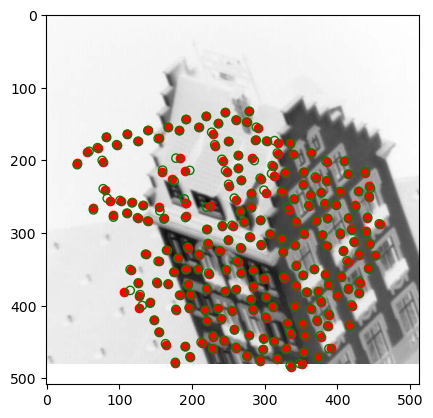

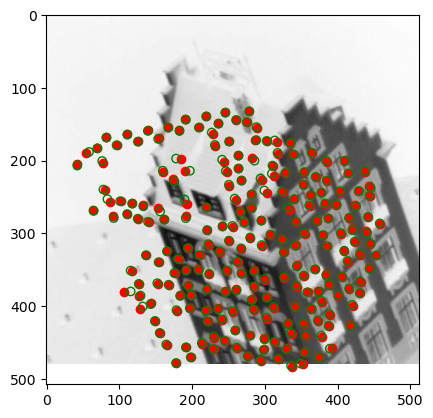

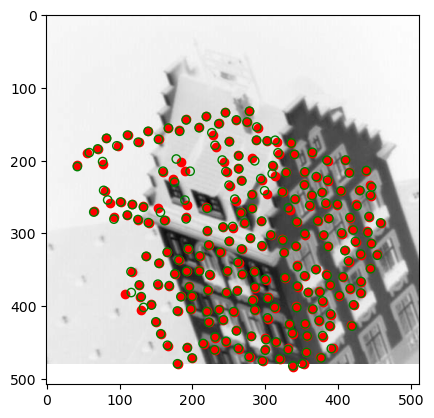

In [27]:
from PIL import Image

frames = [1, 2, 3]
for i in range(3):
    index = frames[i]
    file_name = 'factorization_data/frame0000000{}.jpg'.format(index)
    I = Image.open(file_name)
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(I, cmap='gray_r')
    ax.scatter(D[2 * index - 1, :], D[2 * index, :], c='r')
    # ax.scatter(estimated_D[2 * index - 1, :] + np.mean(D[2 * index - 1, :]),
    #            estimated_D[2 * index, :] + np.mean(D[2 * index, :]),c='none',marker='o',edgecolors='g')
    ax.scatter(estimated_D[2 * index - 1, :],
               estimated_D[2 * index, :], c='none', marker='o', edgecolors='g')
    plt.show()

202
[[366.9767987 ]
 [364.09019959]
 [358.96011927]
 [358.25363934]
 [352.53304969]
 [348.34604267]
 [345.59708926]
 [344.61683825]
 [350.81780577]
 [342.77218058]
 [339.70622487]
 [344.33706819]
 [334.44969983]
 [337.89052734]
 [329.14846611]
 [316.09133198]
 [320.63150003]
 [301.22082641]
 [304.06827237]
 [284.68474511]
 [281.1248818 ]
 [267.47805293]
 [264.72732726]
 [255.1585075 ]
 [240.21657594]
 [236.17342945]
 [231.86652927]
 [225.51964492]
 [220.3107584 ]
 [224.498312  ]
 [222.09816385]
 [221.34576273]
 [216.62694301]
 [220.08049801]
 [225.40130305]
 [228.81014889]
 [218.88141627]
 [228.04669907]
 [216.02873165]
 [212.91413671]
 [226.19342598]
 [224.79060018]
 [226.51985283]
 [221.31389586]
 [213.40891342]
 [216.48335808]
 [221.10735338]
 [223.91644125]
 [219.34055687]
 [223.64328262]
 [218.10726811]
 [223.4357223 ]
 [219.11244542]
 [217.1850391 ]
 [216.24172561]
 [229.62910069]
 [226.81456514]
 [215.86860096]
 [227.71211304]
 [226.51975011]
 [225.2867486 ]
 [225.80438911]
 [22

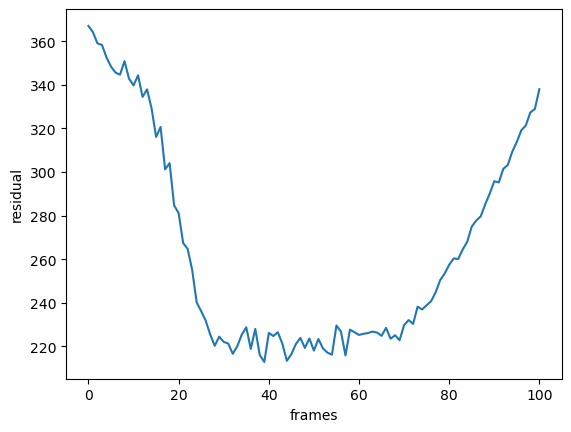

In [28]:
print(m)
residual = np.zeros((101, 1))
for i in range(m):
    for j in range(n):
        residual[int(i / 2), 0] += np.sqrt(abs(estimated_D[i, j] - D[i, j]))
print(residual)
plt.plot(residual)
plt.xlabel('frames')
plt.ylabel('residual')
plt.show()